In [1]:
import pykasso as pk
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pandas   as pd

## Exemple 1

In [2]:
catchment = pk.SKS('inputs/tsanfleuron598x789.yaml') 
catchment.set_parameter('faults_mode', 'csv')  
catchment.update_feature('faults')  

CAUTION: You are using the development version of this package.


In [2]:
catchment = pk.SKS('inputs/tsanfleuron598x789.yaml') 
catchment.set_parameter('orientation_mode', 'surface')                       
catchment.update_feature('orientation') 
catchment.set_parameter('algorithm', 'Riemann2')

CAUTION: You are using the development version of this package.


In [4]:
#geology     = catchment.get_feature('geology')
#topography  = catchment.get_feature('topography')
surface      = catchment.get_feature('surface')
faults      = catchment.get_feature('faults')
fractures   = catchment.get_feature('fractures')
mask = catchment.get_feature('mask')

In [5]:
faults

ID : 5 | Type : faults | Shape : (789, 598, 1) | Mode : null

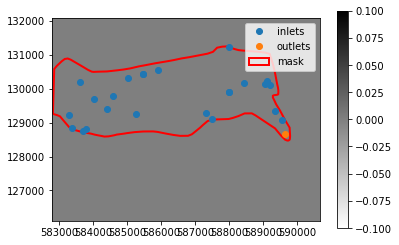

In [6]:
f = catchment.show_catchment(data_key='faults')
#f.set_size_inches(20,20)


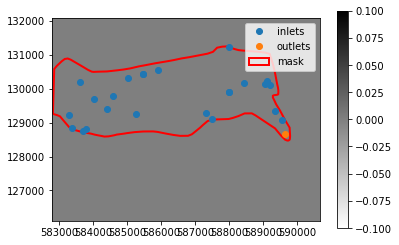

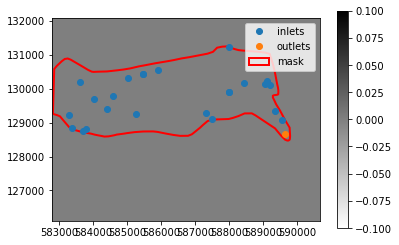

In [7]:
catchment.show_catchment()

In [8]:
faults

ID : 5 | Type : faults | Shape : (789, 598, 1) | Mode : null

In [9]:
catchment.compute_karst_network()


 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\measdaya\Anaconda3\envs\pykasso\lib\site-packages\IPython\core\pylabtools.py:134: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


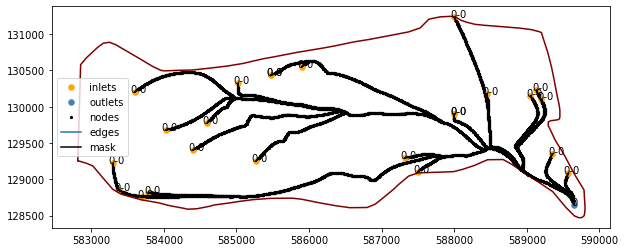

In [3]:
catchment.compute_karst_network()
f = catchment.show_network()

fig,ax = plt.subplots(figsize=(10,10))
alpha=1
ax.set_aspect('equal')
data = catchment.karst_simulations[-1]
closed_polygon = catchment.mask.vertices[:]
closed_polygon.append(closed_polygon[0])
x,y = zip(*closed_polygon)
ax.plot(x,y, color='maroon')
p = matplotlib.lines.Line2D([0],[0], color='maroon')
nodes = data.network['nodes']   #get all nodes
nodes_simple = data.network['karstnet'].graph_simpl.nodes  #get indices of only the nodes in the simplified graph
nodes_simple = {key: nodes[key] for key in nodes_simple}   #make df of only the nodes in the simplified graph, for plotting
edges = data.network['edges']   #get all edges
edges_simple = data.network['karstnet'].graph_simpl.edges  #get only the edges in the simplified graph
edges_simple = {i: edge for i,edge in enumerate(edges_simple)}   #make df of only the edges in the simplified graph, for p
nodes = pd.DataFrame.from_dict(nodes_simple, orient='index', columns=['x','y','type']) #convert to pandas for easier plotting
edges = pd.DataFrame.from_dict(edges_simple, orient='index', columns=['inNode','outNode'])
fromX = nodes.x.loc[edges.inNode]      #calculate coordinates for link start and end points
fromY = nodes.y.loc[edges.inNode]
toX   = nodes.x.loc[edges.outNode]
toY   = nodes.y.loc[edges.outNode]
n = ax.scatter(nodes.x,              nodes.y,                  c='k',         alpha=alpha, s=5)  #scatterplot nodes
i = ax.scatter(data.points['inlets'].x,  data.points['inlets'].y,  c='orange',    s=30) #scatterplot inlets
o = ax.scatter(data.points['outlets'].x, data.points['outlets'].y, c='steelblue', s=30) #scatterplot outlets
e = matplotlib.lines.Line2D([0],[0])
cmap='gray_r'
for ind in edges.index: 
if cmap is not None:
    ax.plot((fromX.iloc[ind], toX.iloc[ind]), (fromY.iloc[ind], toY.iloc[ind]), c=plt.cm.get_cmap(cmap)(ind/len(edges)), alpha=alpha)  #plot each edge, moving along color gradient to show order
    elif color is not None:
    ax.plot((fromX.iloc[ind], toX.iloc[ind]), (fromY.iloc[ind], toY.iloc[ind]), c=color, alpha=alpha)  #plot each edge in same color


In [11]:
def plotkarst( d ):
    fig,ax = plt.subplots(figsize=(10,5))
    ax.set_aspect('equal')
    #d = data.maps['karst'][-1]
    d = np.transpose(d, (1,0))
    #plt.imshow(d, extent=catchment.grid.extent, origin='lower', cmap='binary') #darker=conduits
    plt.imshow(d, extent=catchment.grid.extent, origin='lower', cmap='gray') #darker=conduits
    closed_polygon = catchment.mask.vertices[:]
    closed_polygon.append(closed_polygon[0])
    x,y = zip(*closed_polygon)
    ax.plot(x,y, color='maroon')
    p = matplotlib.lines.Line2D([0],[0], color='k')
    plt.plot(x,y, color='red', label='mask')
    plt.title('Karst map',fontsize=18)
    plt.xlim(582500, 590000)
    plt.ylim(128200, 131500)

In [12]:
plotkarst( data.maps['karst'][-1] )
plotkarst( data.maps['cost'][-1])

NameError: name 'data' is not defined

In [ ]:
plotkarst( catchment.karst_simulations[-1] )
plotkarst( data.maps['cost'][-1] )


In [ ]:
catchment.compare_stats()

In [ ]:
print(catchment.grid.extent)

In [ ]:


        if polygon == True:


        if simplify == True:
            nodes = data.network['nodes']   #get all nodes
            nodes_simple = data.network['karstnet'].graph_simpl.nodes  #get indices of only the nodes in the simplified graph
            nodes_simple = {key: nodes[key] for key in nodes_simple}   #make df of only the nodes in the simplified graph, for plotting
            edges = data.network['edges']   #get all edges
            edges_simple = data.network['karstnet'].graph_simpl.edges  #get only the edges in the simplified graph
            edges_simple = {i: edge for i,edge in enumerate(edges_simple)}   #make df of only the edges in the simplified graph, for p
            nodes = pd.DataFrame.from_dict(nodes_simple, orient='index', columns=['x','y','type']) #convert to pandas for easier plotting
            edges = pd.DataFrame.from_dict(edges_simple, orient='index', columns=['inNode','outNode'])
        else:
            nodes = pd.DataFrame.from_dict(data.network['nodes'], orient='index', columns=['x','y','type']) #convert to pandas for easier plotting
            edges = pd.DataFrame.from_dict(data.network['edges'], orient='index', columns=['inNode','outNode'])

        #Set up data for plotting:
        fromX = nodes.x.loc[edges.inNode]      #calculate coordinates for link start and end points
        fromY = nodes.y.loc[edges.inNode]
        toX   = nodes.x.loc[edges.outNode]
        toY   = nodes.y.loc[edges.outNode]

        #Plot nodes and edges:
        if plot_nodes:
            n = ax.scatter(nodes.y,              nodes.x,                  c='k',         alpha=alpha, s=5)  #scatterplot nodes
        i = ax.scatter(data.points['inlets'].x,  data.points['inlets'].y,  c='orange',    s=30) #scatterplot inlets
        o = ax.scatter(data.points['outlets'].x, data.points['outlets'].y, c='steelblue', s=30) #scatterplot outlets
        e = matplotlib.lines.Line2D([0],[0])                                                  #line artist for legend
        for ind in edges.index:                                                               #loop over edge indices
            if cmap is not None:
                ax.plot((fromY.iloc[ind], toY.iloc[ind]), (fromX.iloc[ind], toX.iloc[ind]), c=plt.cm.get_cmap(cmap)(ind/len(edges)), alpha=alpha)  #plot each edge, moving along color gradient to show order
            elif color is not None:
                ax.plot((fromY.iloc[ind], toY.iloc[ind]), (fromX.iloc[ind], toX.iloc[ind]), c=color, alpha=alpha)  #plot each edge in same color

        #Add labels:
        if labels == None:
            pass
        else:
            if 'nodes' in labels:                                         #label node indices
                for ind in nodes.index:                                   #loop over node indices
                    ax.annotate(str(ind), xy=(nodes.y[ind]-10, nodes.x[ind]))  #annotate slightly to left of each node
            if 'edges' in labels:
                for ind in edges.index:
                    ax.annotate(str(ind), xy=(edges.y[ind]-10, edges.x[ind]))  #annotate slightly to left of each edge
            if 'inlets' in labels:
                for index,inlet in data.points['inlets'].iterrows():
                    ax.annotate(str(int(inlet.outlet))+'-'+str(int(inlet.inlet_iteration)),  xy=(inlet.x-(6*self.grid.dx),  inlet.y))
            if 'outlets' in labels:
                for index,outlet in data.points['outlets'].iterrows():
                    ax.annotate(str(int(outlet.name)), xy=(outlet.x-(4*self.grid.dx), outlet.y))

        #Add legend & title:
        if legend:
            if plot_nodes:
                if plot_polygon:
                    ax.legend([i,o,n,e,p],['inlets','outlets','nodes','edges','polygon'])
                else:
                    ax.legend([i,o,n,e],['inlets','outlets','nodes','edges'])
            else:
                if plot_polygon:
                    ax.legend([i,o,e,p],['inlets','outlets','edges','polygon'])
                else:
                    ax.legend([i,o,e],['inlets','outlets','edges','polygon'])
        if title is not None:
            ax.set_title(title, fontsize=16)

        return None

In [ ]:
f.savefig('test.png',dpi=300)

## Exemple 2

In [ ]:
tsanfleuron = pk.SKS('inputs/tsanfleuron598x789.yaml')

In [ ]:
for data in ["geology", "faults", "fractures", "orientationx", "orientationy"]:
    tsanfleuron.show_catchment(data)

In [ ]:
tsanfleuron.compute_karst_network()
tsanfleuron.show()

for i in range(10):
    tsanfleuron.update_feature('fractures')
    tsanfleuron.set_parameter('outlets_mode', 'random') 
    tsanfleuron.set_parameter('outlets_number', 1) 
    tsanfleuron.set_parameter('inlets_mode', 'composite') 
    tsanfleuron.set_parameter('inlets_number', 100) 
    tsanfleuron.update_feature('inlets')
    tsanfleuron.update_feature('outlets')
    tsanfleuron.compute_karst_network()
    tsanfleuron.show()

## Exemple Chloé

In [ ]:
catchment = pk.SKS('inputs/tsanfleuron598x789.yaml') 
#catchment.set_parameter('data_has_mask', True)                             
#catchment.update_feature('mask')
catchment.set_parameter('orientation_mode', 'surface')                       
catchment.update_feature('orientation')                  
catchment.compute_karst_network()
f = catchment.show()